## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import nltk
import re
import re,string,unicodedata
from nltk.corpus import stopwords

from keras.preprocessing.text import Tokenizer

from keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Reading Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_json("/content/drive/MyDrive/Sarcasm/Sarcasm_Headlines_Dataset.json", lines=True)

## Data Exploration

In [6]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [8]:
df.shape

(26709, 3)

In [9]:
# Checking null values, if any.

df.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [10]:
df.describe()

,is_sarcastic
count,26709.000000
mean,0.438953
std,0.496269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [11]:
# Checking duplicate values in headlines

df['headline'].duplicated().sum()


107

In [12]:
# Dropping duplicate values 

df=df.drop(df[df['headline'].duplicated()].index,axis=0)

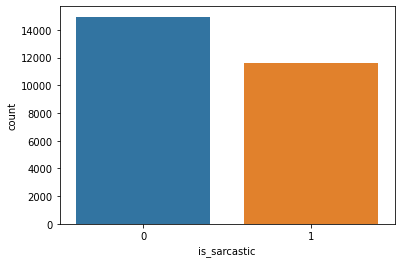

In [13]:
# Countplot for if sarcasm exists or not, 1 = yes and 0 = no

sns.countplot(df['is_sarcastic']);


We can clearly see that the data has more non sarcastic headlines than sarcastic headlines

## Preprocessing of Data

### Stopwords Removal

In [14]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

#Removing the stopwords from text
def split_into_words(text):
    # split into words by white space
    words = text.split()
    return words

def to_lower_case(words):
    # convert to lower case
    words = [word.lower() for word in words]
    return words

def remove_punctuation(words):
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    stripped = [re_punc.sub('', w) for w in words]
    return stripped

def keep_alphabetic(words):
    # remove remaining tokens that are not alphabetic
    words = [word for word in words if word.isalpha()]
    return words

def remove_stopwords(words):
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

def to_sentence(words):
    # join words to a sentence
    return ' '.join(words)

#Removing the noisy text
def denoise_text(text):
    words = split_into_words(text)
    words = to_lower_case(words)
    words = remove_punctuation(words)
    words = keep_alphabetic(words)
    words = remove_stopwords(words)
    return to_sentence(words)
#

In [15]:
#Apply function on review column
df['headline']=df['headline'].apply(denoise_text)

In [16]:
labels = (df['is_sarcastic'])
data = (df['headline'])

### Splitting the Data

In [17]:
train_ratio = 0.80

train_size = int(len(labels)*train_ratio)

train_data = data[:train_size]
train_labels= labels[:train_size]

test_data = data[train_size:]
test_labels = labels[train_size:]

### Tokenizaton and Padding

In [18]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(train_data)

vocab_size = len(tokenizer.word_index)
print(vocab_size)

train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

24522


In [19]:
maxlen=max([len(i) for i in train_sequences])

In [20]:
train_padded = pad_sequences(train_sequences, maxlen=maxlen,  padding='post')
test_padded = pad_sequences(test_sequences, maxlen=maxlen,  padding='post')

In [21]:
# Print a sample headline
index = 10
print(f'sample headline: {train_sequences[index]}')
print(f'padded sequence: {train_padded[index]} \n')

print(f'Original Sentence:  \n {tokenizer.sequences_to_texts(train_sequences[index:index+1])} \n')

# Print dimensions of padded sequences
print(f'shape of padded sequences: {train_padded.shape}')

sample headline: [3050, 1791, 4182, 4, 4771, 6794, 1792, 821]
padded sequence: [3050 1791 4182    4 4771 6794 1792  821    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0] 

Original Sentence:  
 ['airline passengers tackle man rushes cockpit bomb threat'] 

shape of padded sequences: (21281, 25)


## Data Modelling

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1,100,input_length=maxlen),
    tf.keras.layers.Bidirectional( tf.keras.layers.LSTM(128)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 100)           2452300   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

In [23]:
history=model.fit(train_padded, np.array(train_labels),validation_data = (test_padded,np.array(test_labels)) , epochs = 5 , verbose=2)

Epoch 1/5
666/666 - 47s - loss: 0.4800 - accuracy: 0.7604 - val_loss: 0.4114 - val_accuracy: 0.8138 - 47s/epoch - 71ms/step
Epoch 2/5
666/666 - 42s - loss: 0.2112 - accuracy: 0.9180 - val_loss: 0.4724 - val_accuracy: 0.8053 - 42s/epoch - 63ms/step
Epoch 3/5
666/666 - 42s - loss: 0.0872 - accuracy: 0.9690 - val_loss: 0.6402 - val_accuracy: 0.7927 - 42s/epoch - 64ms/step
Epoch 4/5
666/666 - 42s - loss: 0.0412 - accuracy: 0.9866 - val_loss: 0.8289 - val_accuracy: 0.7884 - 42s/epoch - 63ms/step
Epoch 5/5
666/666 - 42s - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.9521 - val_accuracy: 0.7914 - 42s/epoch - 64ms/step


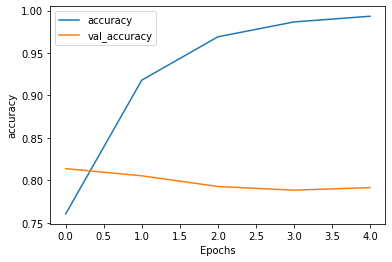

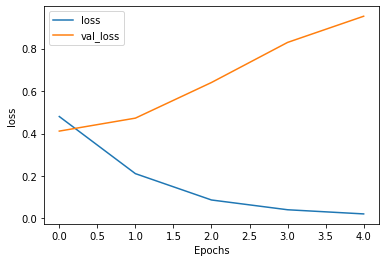

In [24]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(model, string):
  plt.plot(model.history[string])
  plt.plot(model.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Creating a WordCloud

In [25]:
# Importing necessary libraries
from wordcloud import WordCloud, STOPWORDS

In [26]:
sarcastic_words = ''
stopwords = set(STOPWORDS)

In [27]:
# iterate through the csv file
for val in df.headline:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    sarcastic_words += " ".join(tokens)+" "

In [28]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 15).generate(sarcastic_words)

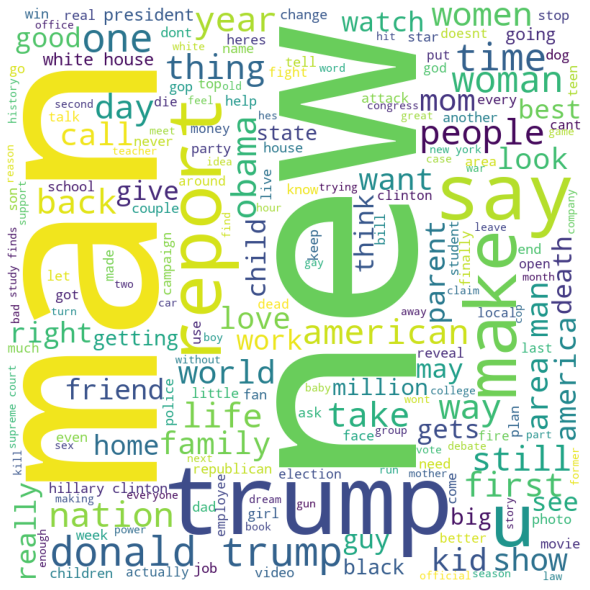

In [29]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Hugging Face Transformers - Sentiment Analysis

In [30]:
# Install transformers and datasets:

!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 34.0 MB/s 
     |████████████████████████████████| 451 kB 78.8 MB/s 
     |████████████████████████████████| 7.6 MB 73.3 MB/s 
     |████████████████████████████████| 182 kB 53.8 MB/s 
     |████████████████████████████████| 132 kB 63.8 MB/s 
     |████████████████████████████████| 212 kB 92.0 MB/s 
     |████████████████████████████████| 127 kB 75.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [31]:
# Hugging Face related:

from transformers import pipeline
from datasets import load_dataset
from datasets import Dataset

In [34]:
# Transform pandas dataframe to hugging face dataset:

dataset = Dataset.from_pandas(df)

In [33]:
# Take a sample of dataset
# Select(range(1000)) will select top 1000 rows.
# Hence shuffle is a must to take a sample:

headline_sample = dataset.shuffle(seed=42).select(range(1000))
headline_sample.shape  # (1000, 7)

(1000, 4)

In [ ]:
# Column names of data:

headline_sample.column_names

['article_link', 'headline', 'is_sarcastic', '__index_level_0__']

In [ ]:
# Look at 3 rows of column of interest:

dataset['headline'][:3]

['former versace store clerk sues secret black code minority shoppers',
 'roseanne revival catches thorny political mood better worse',
 'mom starting fear sons web series closest thing grandchild']

In [35]:
# Instantiate 'pipeline' for sentiment-anaysis
# Once instantiated, 'classifier' object can be used for sentiment analysis:

classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [36]:
# Can use other models also:

# Classifier1 = pipeline("sentiment-analysis",
#                         model="siebert/sentiment-roberta-large-english"
#                        )

classifier2 = pipeline("sentiment-analysis",
                       model="Remicm/sentiment-analysis-model-for-socialmedia"
                       )  # Label_1 is +ve; Label_0 is -ve

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/711k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [37]:
# Classify five of the reviews:

classifier(headline_sample['headline'][:5])

[{'label': 'NEGATIVE', 'score': 0.9996054768562317},
 {'label': 'NEGATIVE', 'score': 0.996891438961029},
 {'label': 'NEGATIVE', 'score': 0.9175854921340942},
 {'label': 'NEGATIVE', 'score': 0.9929836988449097},
 {'label': 'NEGATIVE', 'score': 0.9848393797874451}]

In [38]:
classifier2(headline_sample['headline'][:5])

[{'label': 'LABEL_0', 'score': 0.9340657591819763},
 {'label': 'LABEL_0', 'score': 0.8443523645401001},
 {'label': 'LABEL_0', 'score': 0.9376280307769775},
 {'label': 'LABEL_0', 'score': 0.8713158965110779},
 {'label': 'LABEL_0', 'score': 0.9753849506378174}]